In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Unziping Data
!7z e "../input/kkbox-music-recommendation-challenge/members.csv.7z"
!7z e "../input/kkbox-music-recommendation-challenge/songs.csv.7z"
!7z e "../input/kkbox-music-recommendation-challenge/test.csv.7z"
!7z e "../input/kkbox-music-recommendation-challenge/train.csv.7z"
!7z e "../input/kkbox-music-recommendation-challenge/song_extra_info.csv.7z"

In [ ]:
# Load data
df = pd.read_csv('./train.csv')
df

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


In [ ]:
# Sampling Only Half the Data
df = df.sample(frac=0.5)

In [ ]:
# Load and join songs data
songs = pd.read_csv('./songs.csv')
df = pd.merge(df, songs, on='song_id', how='left')
del songs

# Load and join members data
members = pd.read_csv('./members.csv')
df = pd.merge(df, members, on='msno', how='left')
del members

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688709 entries, 0 to 3688708
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   msno                    object 
 1   song_id                 object 
 2   source_system_tab       object 
 3   source_screen_name      object 
 4   source_type             object 
 5   target                  int64  
 6   song_length             float64
 7   genre_ids               object 
 8   artist_name             object 
 9   composer                object 
 10  lyricist                object 
 11  language                float64
 12  city                    int64  
 13  bd                      int64  
 14  gender                  object 
 15  registered_via          int64  
 16  registration_init_time  int64  
 17  expiration_date         int64  
dtypes: float64(2), int64(6), object(10)
memory usage: 534.7+ MB


In [ ]:
df.describe()

,target,song_length,language,city,bd,registered_via,registration_init_time,expiration_date
count,3.688709e+06,3.688655e+06,3.688641e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06
mean,5.033363e-01,2.451273e+05,1.860747e+01,7.509178e+00,1.754547e+01,6.794569e+00,2.012810e+07,2.017156e+07
std,4.999889e-01,6.720780e+04,2.117742e+01,6.640343e+00,2.168882e+01,2.275806e+00,3.017314e+04,3.882418e+03
min,0.000000e+00,1.393000e+03,-1.000000e+00,1.000000e+00,-4.300000e+01,3.000000e+00,2.004033e+07,1.970010e+07
25%,0.000000e+00,2.147260e+05,3.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,2.011070e+07,2.017091e+07
50%,1.000000e+00,2.417890e+05,3.000000e+00,5.000000e+00,2.100000e+01,7.000000e+00,2.013102e+07,2.017093e+07
75%,1.000000e+00,2.721690e+05,5.200000e+01,1.300000e+01,2.900000e+01,9.000000e+00,2.015102e+07,2.017101e+07
max,1.000000e+00,1.085171e+07,5.900000e+01,2.200000e+01,1.051000e+03,1.300000e+01,2.017013e+07,2.020102e+07


In [ ]:
dtypes = pd.DataFrame(df.dtypes,columns=["Data Type"])

dtypes["Unique Values"]=df.nunique().sort_values(ascending=True)

dtypes["Null Values"]=df.isnull().sum()

dtypes["% null Values"]=df.isnull().sum()/len(df)

dtypes.sort_values(by="Null Values" , ascending=False).style.background_gradient(cmap='YlOrRd',axis=0)

,Data Type,Unique Values,Null Values,% null Values
lyricist,object,27461,1590363,0.431144
gender,object,2,1480560,0.401376
composer,object,59358,838618,0.227347
source_screen_name,object,20,207767,0.056325
genre_ids,object,525,59089,0.016019
source_system_tab,object,8,12380,0.003356
source_type,object,12,10688,0.002897
language,float64,10,68,0.000018
song_length,float64,49826,54,0.000015
artist_name,object,32259,54,0.000015


**Visualizing Null Values**

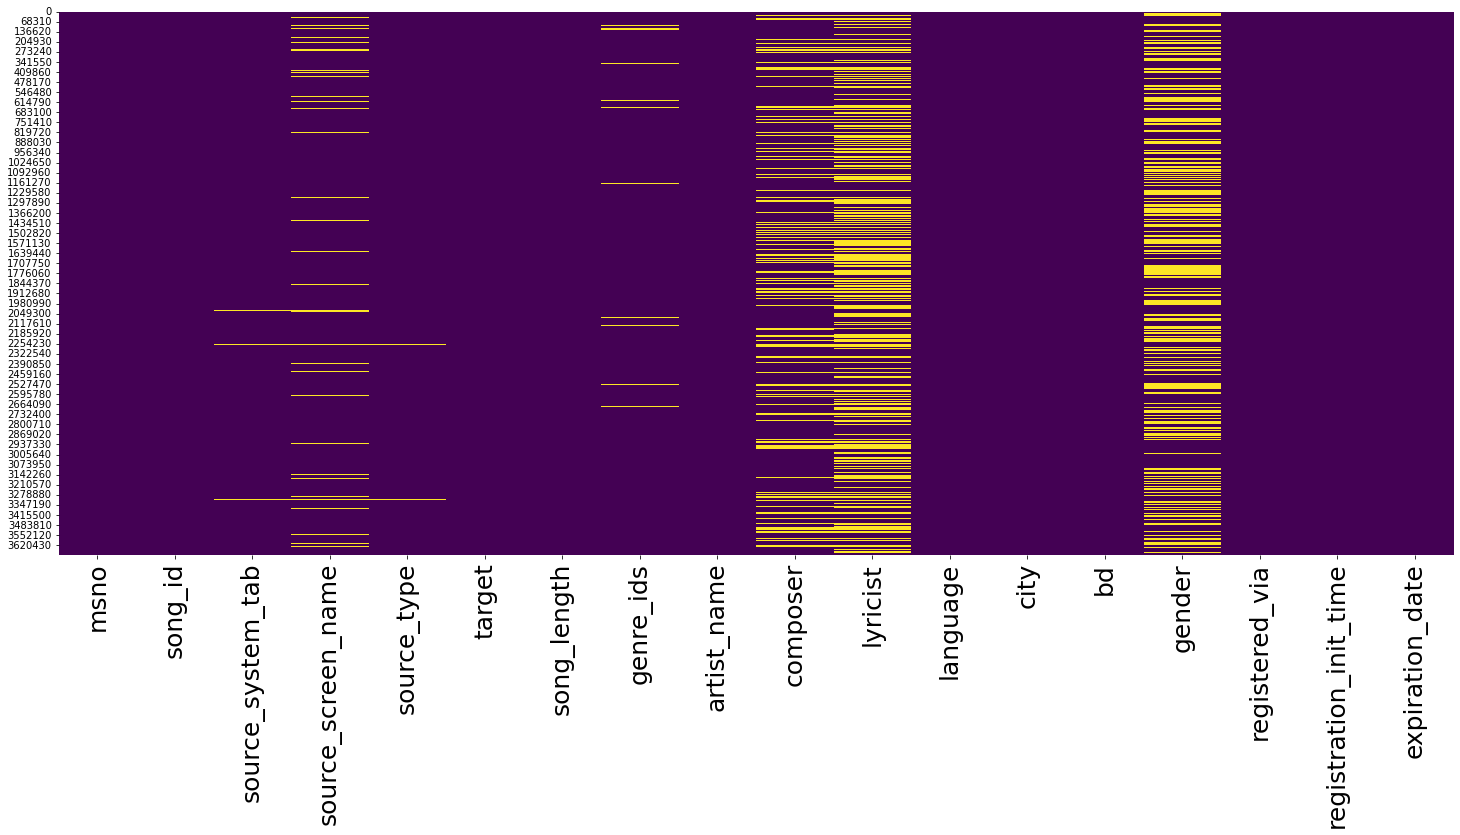

In [ ]:
plt.figure(figsize=(25,10))

sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.tick_params(axis='x', labelsize=25)

# **Filling Null Values**

In [ ]:
# Strings with 'Unknown'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(value = "unknown")
# Numerics with mean    
for col in df.select_dtypes(exclude=['object']).columns:
    df[col] = df[col].fillna(value = df[col].mean())

In [ ]:
df.isna().sum()

msno                      0
song_id                   0
source_system_tab         0
source_screen_name        0
source_type               0
target                    0
song_length               0
genre_ids                 0
artist_name               0
composer                  0
lyricist                  0
language                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

# **Parsing Dates and Extracting new Date Features**

In [ ]:
df['registration_init_time'] = pd.to_datetime(df['registration_init_time'], format='%Y%m%d', errors='ignore')
df['registration_init_time_year'] = df['registration_init_time'].dt.year
df['registration_init_time_month'] = df['registration_init_time'].dt.month
df['registration_init_time_day'] = df['registration_init_time'].dt.day


df['expiration_date'] = pd.to_datetime(df['expiration_date'],  format='%Y%m%d', errors='ignore')
df['expiration_date_year'] = df['expiration_date'].dt.year
df['expiration_date_month'] = df['expiration_date'].dt.month
df['expiration_date_day'] = df['expiration_date'].dt.day

In [ ]:
# Dates to categoty
df['registration_init_time'] = df['registration_init_time'].astype('category')
df['expiration_date'] = df['expiration_date'].astype('category') 

In [ ]:
df.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,EOlbX3GsW3ObXy/9ykwK2RQqHK6vDQWmv+BtQ8efMrk=,dPpRZkprJPrXymsgmRzbuEbPyp3ZKIyXPMNiHn/Mgy4=,my library,Local playlist more,local-library,0,217861.0,465,李佳薇 (Jess Lee),Hsiao Huang Qi,...,male,9,2008-11-29,2017-10-01,2008,11,29,2017,10,1
1,af/5A7zGWNA+/J+h42aTLrUyeDCX23AlYShMrwuh2K4=,kFx6IW7O34CiWxdfV61/cIjZs57ZasQBPjJQSJk2pk0=,search,Search Home,online-playlist,0,239046.0,465,G.E.M.鄧紫棋,黃家駒,...,unknown,4,2016-12-12,2016-12-18,2016,12,12,2016,12,18
2,Q5Gq/NJ/yn5W3SnWvan4I6xCaI+qNBDHx6AKjNBcp40=,9KpbSXj7GneDeN8Yp/Xj95fzGHf2svBRSJZJQLT8ve0=,my library,Local playlist more,local-playlist,1,238968.0,458,周杰倫 (Jay Chou),周杰倫,...,female,7,2011-04-30,2018-04-04,2011,4,30,2018,4,4
3,dZNojW/n4mqxR6RSZt4CMeCnJzzxBYi6n9qQCKbghvE=,kNjhNUkKoEMJWTJIjmrpr96+SFCokBq/hn39J/kONy8=,listen with,Others profile more,listen-with,0,255360.0,465,丁噹 (Della),謝廣太,...,female,9,2012-09-13,2017-09-30,2012,9,13,2017,9,30
4,RhqjwU2cVgX18gKkuEsa8mp8gZbOsefSX1+NWWLU6sM=,roETSR8HWLvpSFMYT5yhf2WKjGjldW0yFZp4l4y9NZ4=,discover,Album more,album,0,241811.0,465,2006 MP3人氣超強總冠軍,unknown,...,unknown,7,2013-01-26,2018-02-04,2013,1,26,2018,2,4


# **Encoding and Categorizating Columns**

In [ ]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688709 entries, 0 to 3688708
Data columns (total 24 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   msno                          int16  
 1   song_id                       int32  
 2   source_system_tab             int8   
 3   source_screen_name            int8   
 4   source_type                   int8   
 5   target                        int64  
 6   song_length                   float64
 7   genre_ids                     int16  
 8   artist_name                   int16  
 9   composer                      int32  
 10  lyricist                      int16  
 11  language                      float64
 12  city                          int64  
 13  bd                            int64  
 14  gender                        int8   
 15  registered_via                int64  
 16  registration_init_time        int16  
 17  expiration_date               int16  
 18  registration_init_time

In [ ]:
df.describe()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
count,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,...,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06,3.688709e+06
mean,1.503996e+04,1.293985e+05,2.440858e+00,9.084804e+00,4.765573e+00,5.033363e-01,2.451273e+05,3.067157e+02,2.176936e+04,4.171942e+04,...,1.114061e+00,6.794569e+00,2.544288e+03,9.531837e+02,2.012740e+03,6.834222e+00,1.582016e+01,2.017072e+03,8.342848e+00,1.562370e+01
std,8.678769e+03,7.483269e+04,1.890758e+00,4.595821e+00,2.469295e+00,4.999889e-01,6.720731e+04,9.010674e+01,9.974299e+03,1.641457e+04,...,8.219986e-01,2.275806e+00,9.643076e+02,1.120784e+02,3.018895e+00,3.700336e+00,8.770339e+00,3.994788e-01,2.510408e+00,9.106291e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.393000e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,2.004000e+03,1.000000e+00,1.000000e+00,1.970000e+03,1.000000e+00,1.000000e+00
25%,7.519000e+03,6.440000e+04,0.000000e+00,8.000000e+00,3.000000e+00,0.000000e+00,2.147260e+05,3.140000e+02,1.394200e+04,3.001200e+04,...,0.000000e+00,4.000000e+00,1.946000e+03,9.420000e+02,2.011000e+03,3.000000e+00,8.000000e+00,2.017000e+03,9.000000e+00,8.000000e+00
50%,1.512100e+04,1.288930e+05,3.000000e+00,8.000000e+00,4.000000e+00,1.000000e+00,2.417890e+05,3.210000e+02,2.707900e+04,5.010800e+04,...,1.000000e+00,7.000000e+00,2.673000e+03,9.570000e+02,2.013000e+03,7.000000e+00,1.600000e+01,2.017000e+03,9.000000e+00,1.500000e+01
75%,2.259800e+04,1.932110e+05,3.000000e+00,1.100000e+01,6.000000e+00,1.000000e+00,2.721690e+05,3.210000e+02,2.944700e+04,5.295200e+04,...,2.000000e+00,9.000000e+00,3.403000e+03,9.670000e+02,2.015000e+03,1.000000e+01,2.300000e+01,2.017000e+03,1.000000e+01,2.300000e+01
max,3.001300e+04,2.594860e+05,8.000000e+00,2.000000e+01,1.200000e+01,1.000000e+00,1.085171e+07,5.250000e+02,3.225900e+04,5.935700e+04,...,2.000000e+00,1.300000e+01,3.806000e+03,1.371000e+03,2.017000e+03,1.200000e+01,3.100000e+01,2.020000e+03,1.200000e+01,3.100000e+01


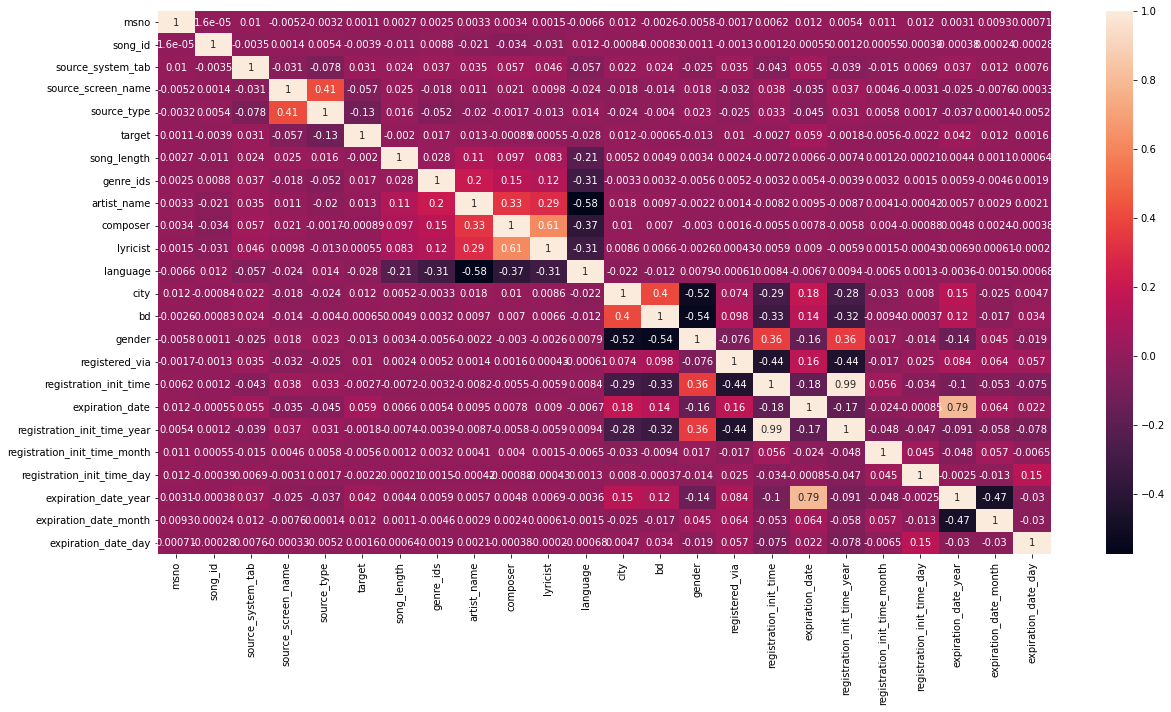

In [ ]:
# Сorrelation matrix
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), annot=True)
plt.show()

# **Train and Test split**

In [ ]:
target = df.pop('target')
train_data, test_data, train_labels, test_labels = train_test_split( df , target, test_size = 0.2)

print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(2950967, 23)
(2950967,)
(737742, 23)
(737742,)


# **Feature Selection with Random Forest**

In [ ]:
# Model with the best estimator
RF = RandomForestClassifier()
RF.fit(train_data, train_labels)

RF_TrainScore = RF.score(train_data, train_labels)
RF_TrainScore

0.9999949169204535

In [ ]:
RF_TestScore = RF.score(test_data, test_labels)
RF_TestScore

0.7161717782097264

In [ ]:
y_pred_rf =RF.predict(test_data)

<AxesSubplot:>

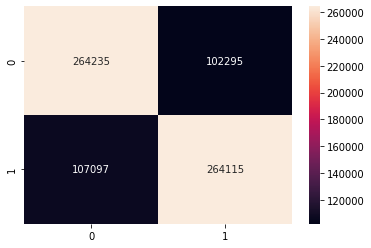

In [ ]:
#Confusion matrix
import seaborn as sns 
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(test_labels, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='g')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_pred_rf))

              precision    recall  f1-score   support

           0       0.71      0.72      0.72    366530
           1       0.72      0.71      0.72    371212

    accuracy                           0.72    737742
   macro avg       0.72      0.72      0.72    737742
weighted avg       0.72      0.72      0.72    737742



**Feature Selection**

In [ ]:
df_plot = pd.DataFrame({'features': df.columns,
                        'importances': RF.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

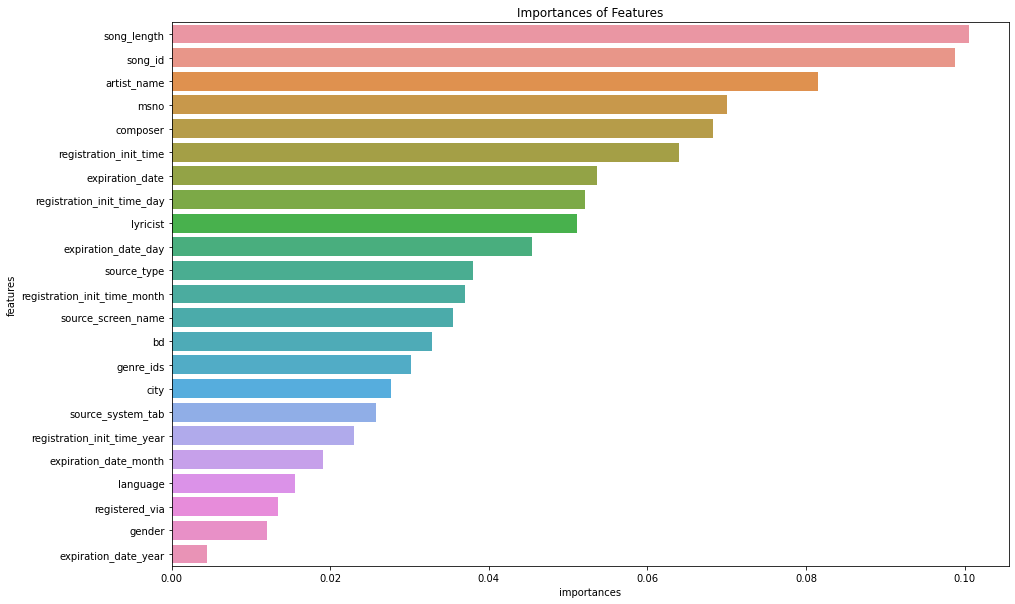

In [ ]:
plt.figure(figsize=[15,10])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features')
plt.show()

In [ ]:
# Drop columns with importances < 0.04
df = df.drop(df_plot.features[df_plot.importances < 0.04].tolist(), 1)

In [ ]:
# Selected columns
print(df.shape)
df.columns

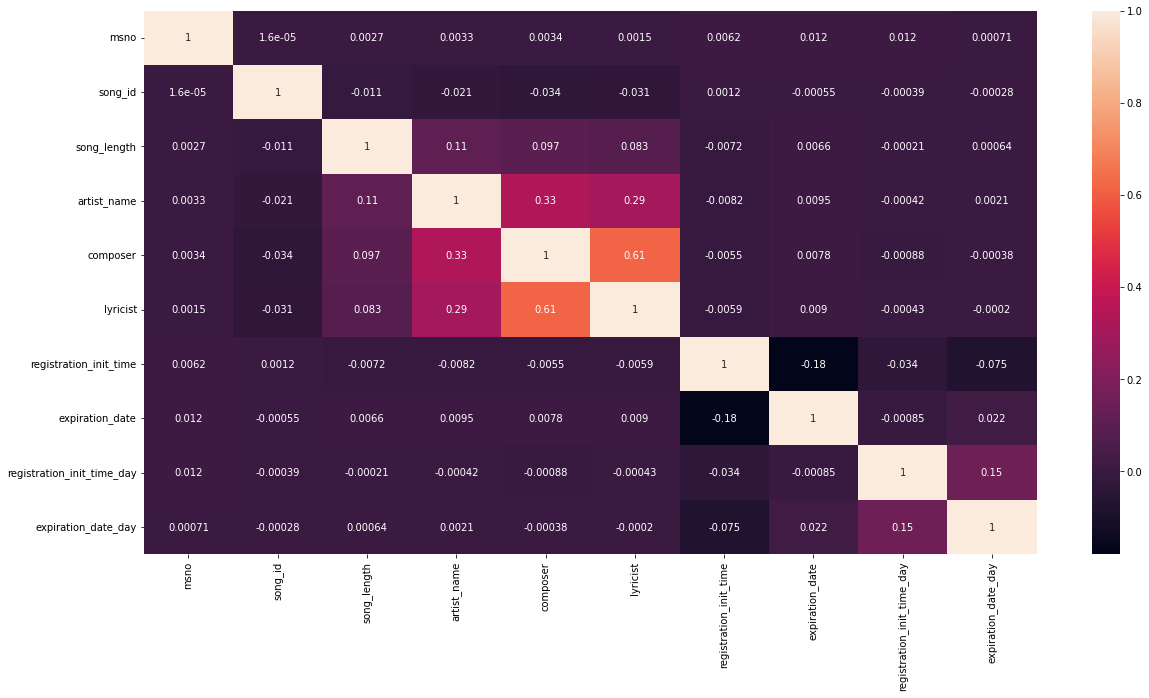

In [ ]:
# Сorrelation matrix
plt.figure(figsize=[20,10])
sns.heatmap(df.corr(), annot=True)
plt.show()

# **XGBoosting**

In [ ]:
import xgboost as xgb

In [ ]:
# Create model
XGB = xgb.XGBClassifier(learning_rate=0.1, max_depth=15, min_child_weight=5)
XGB.fit(train_data, train_labels)

XGB_TrainScore = XGB.score(train_data, train_labels)
XGB_TrainScore

0.7634287336998347

In [ ]:
XGB_TestScore = XGB.score(test_data, test_labels)

XGB_TestScore

0.7096844154189405

In [ ]:
y_pred_xgb =XGB.predict(test_data)

<AxesSubplot:>

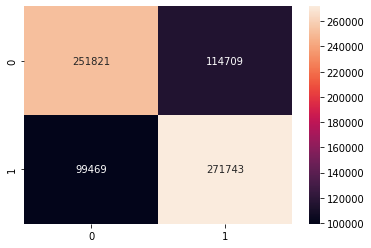

In [ ]:
cm_lgbm = confusion_matrix(test_labels, y_pred_xgb)
sns.heatmap(cm_lgbm, annot=True, fmt='g')

In [ ]:
print(classification_report(test_labels, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.72      0.69      0.70    366530
           1       0.70      0.73      0.72    371212

    accuracy                           0.71    737742
   macro avg       0.71      0.71      0.71    737742
weighted avg       0.71      0.71      0.71    737742



# **Light LGBM**

In [ ]:
import lightgbm as lgb

d_train = lgb.Dataset(train_data, label=train_labels)

In [ ]:
params = {
        'objective': 'binary',
        'boosting': 'dart',
        'learning_rate': 0.2 ,
        'verbose': 0,
        'num_leaves': 100,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'num_rounds': 100,
        'metric' : 'auc'
    }

In [ ]:
clf = lgb.train(params, d_train, 100)

In [ ]:
y_predtrain_lgbm=clf.predict(train_data)

y_predtest_lgbm=clf.predict(test_data)

In [ ]:
# Making Prediction for training and test sets
for i in range(0, train_data.shape[0]):
    if y_predtrain_lgbm[i]>=.5: 
        y_predtrain_lgbm[i]=1
    else:  
        y_predtrain_lgbm[i]=0
        
for i in range(0, test_data.shape[0]):
    if y_predtest_lgbm[i]>=.5: 
        y_predtest_lgbm[i]=1
    else:  
        y_predtest_lgbm[i]=0        

In [ ]:
from sklearn.metrics import accuracy_score


LGBM_TrainScore = accuracy_score(y_predtrain_lgbm,train_labels)
LGBM_TestScore = accuracy_score(y_predtest_lgbm,test_labels)
#Print accuracy
print ("Test Accuracy with LGBM = ", LGBM_TrainScore)
print ("Test Accuracy with LGBM = ", LGBM_TestScore)

Test Accuracy with LGBM =  0.6550927204540071
Test Accuracy with LGBM =  0.6533612021546829


<AxesSubplot:>

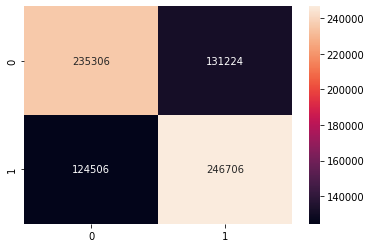

In [ ]:
#Confusion matrix
import seaborn as sns 
from sklearn.metrics import confusion_matrix

cm_lgbm = confusion_matrix(test_labels, y_predtest_lgbm)
sns.heatmap(cm_lgbm, annot=True, fmt='g')

In [ ]:
print(classification_report(test_labels, y_predtest_lgbm))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65    366530
           1       0.65      0.66      0.66    371212

    accuracy                           0.65    737742
   macro avg       0.65      0.65      0.65    737742
weighted avg       0.65      0.65      0.65    737742



In [ ]:
from catboost import CatBoostClassifier

# **CatBoost Classifier**

In [ ]:
CatBoost = CatBoostClassifier(learning_rate=0.1, depth=10, iterations=300)
CatBoost.fit(train_data, train_labels)


CatBoost_TrainScore = CatBoost.score(train_data, train_labels)


In [ ]:
CatBoost_TrainScore

0.6695757695697715

In [ ]:
CatBoost_TestScore = CatBoost.score(test_data, test_labels)
CatBoost_TestScore

0.6649207988700657

In [ ]:
# Predicting
y_pred_catboost = CatBoost.predict(test_data)

<AxesSubplot:>

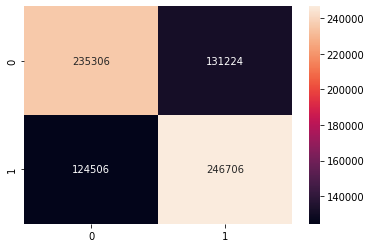

In [ ]:
cm_catboost = confusion_matrix(test_labels, y_pred_catboost)
sns.heatmap(cm_lgbm, annot=True, fmt='g')

In [ ]:
print(classification_report(test_labels, y_pred_catboost))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65    366530
           1       0.66      0.69      0.68    371212

    accuracy                           0.66    737742
   macro avg       0.67      0.66      0.66    737742
weighted avg       0.67      0.66      0.66    737742



# **Comparing Boostings Results**

In [ ]:
results = pd.DataFrame( [["Random Forest", RF_TrainScore, RF_TestScore ],
                       ["XGBoost", XGB_TrainScore ,XGB_TestScore ],
                        ["Light LGBM", LGBM_TrainScore ,LGBM_TestScore ],
                        ["CatBoost", CatBoost_TrainScore ,CatBoost_TestScore ]],
                       columns = ["Model","Training Accuracy %","Test Evaluation %"]).sort_values(by="Test Evaluation %",ascending=False)
results.style.background_gradient(cmap='BuPu')

,Model,Training Accuracy %,Test Evaluation %
0,Random Forest,0.999995,0.716172
1,XGBoost,0.763429,0.709684
3,CatBoost,0.669576,0.664921
2,Light LGBM,0.655093,0.653361
